Homework 2
Import Boston Dataset from sklearn dataset class.

Explore and analyse raw data.

Do preprocessing for regression.

Split your dataset into train and test test (0.7 for train and 0.3 for test).

Try Ridge and Lasso Regression models with at least 5 different alpha value for each.

Evaluate the results of all models and choose the best performing model.

In [ ]:
#connection to Colab and Drive 
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 145483 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.23-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.23-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.23-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope

In [1]:
#libraries 
from sklearn.datasets import load_boston 
#imported boston data 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt 
import csv 
import re 

from math import sqrt
from sklearn.model_selection import train_test_split
from numpy import concatenate
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error


In [2]:
X, y = load_boston(return_X_y=True)

In [7]:
#gather dataset 
Xb,yb =load_boston(return_X_y=True)

df_boston = pd.DataFrame(Xb,columns = load_boston().feature_names)
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
df_boston.info()
#continous variables 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [9]:
print(X.shape)

(506, 13)


In [ ]:
df_boston.describe()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [ ]:
df_boston.isna().sum()
#explore missing values

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [ ]:
df_boston.isin(['?']).sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

No missing values in dataset 

In [ ]:
#correlation matrix 
corr = df_boston.corr()
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


In [ ]:
# Outlier detection with Z-Score
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df_boston))
z

array([[0.41978194, 0.28482986, 1.2879095 , ..., 1.45900038, 0.44105193,
        1.0755623 ],
       [0.41733926, 0.48772236, 0.59338101, ..., 0.30309415, 0.44105193,
        0.49243937],
       [0.41734159, 0.48772236, 0.59338101, ..., 0.30309415, 0.39642699,
        1.2087274 ],
       ...,
       [0.41344658, 0.48772236, 0.11573841, ..., 1.17646583, 0.44105193,
        0.98304761],
       [0.40776407, 0.48772236, 0.11573841, ..., 1.17646583, 0.4032249 ,
        0.86530163],
       [0.41500016, 0.48772236, 0.11573841, ..., 1.17646583, 0.44105193,
        0.66905833]])

In [ ]:
#outlier detection 
outliers = list(set(np.where(z > 3)[0]))

len(outliers)
#outlier =91

91

In [ ]:
#drop 91 outliers 
outliers = list(set(np.where(z > 3)[0]))
new_df = df_boston.drop(outliers,axis = 0).reset_index(drop = False)
display(new_df)

y_new = yb[list(new_df["index"])]
len(y_new)

,index,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
411,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
412,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
413,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


415

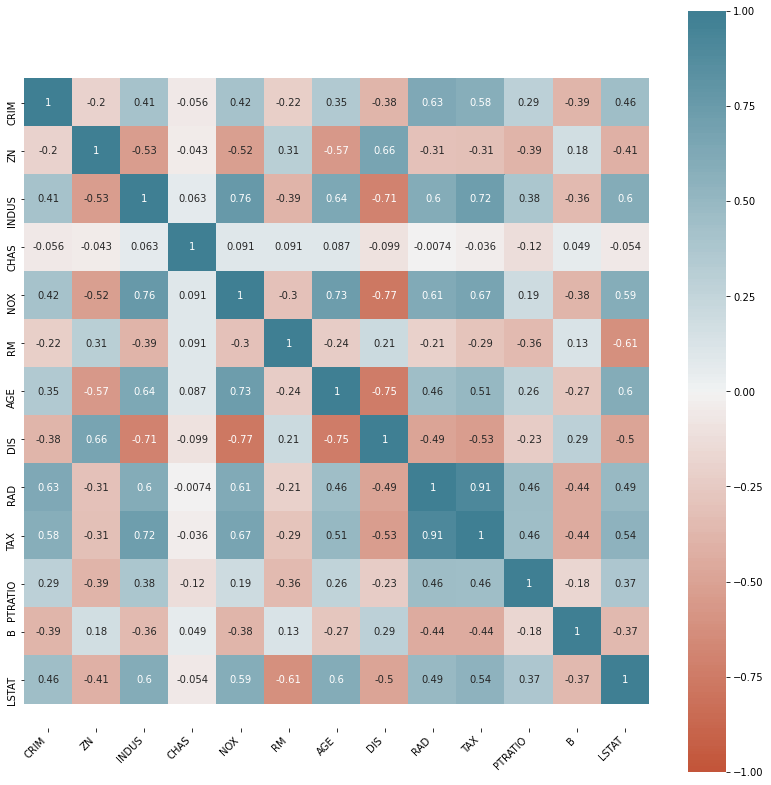

In [ ]:
#correlation matrix 
import seaborn as sns
corr = df_boston.corr()

plt.figure(figsize=(14, 14))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_ylim(len(corr)+0.5, -0.5);


DIS and AGE

DIS AND NOX

DIS and INDUS are inversely correlated. 

TAX and RAD 

AGE and NOX  are highly correlated.


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


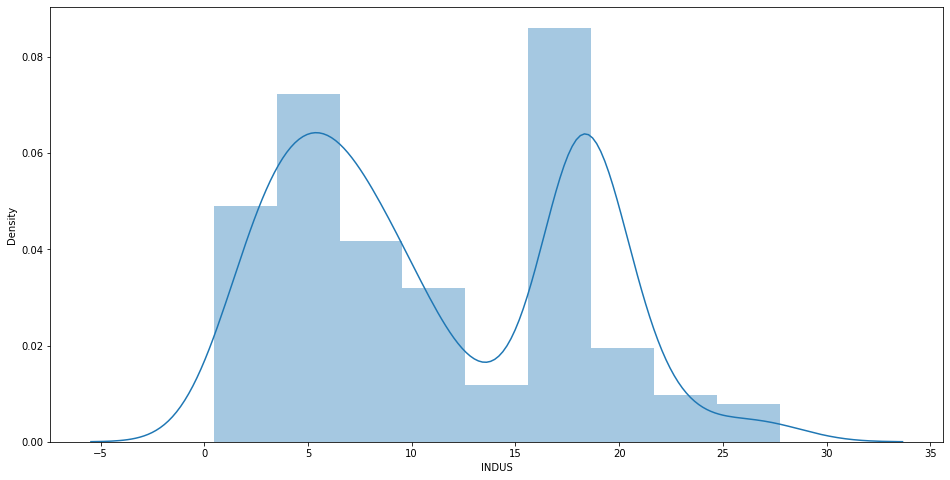

In [ ]:
import seaborn as sns
plt.figure(figsize=(16, 8))
sns.distplot(df_boston["INDUS"])
#if we redesign intervals, the distirbution can be similar to Gaussian distribuion 

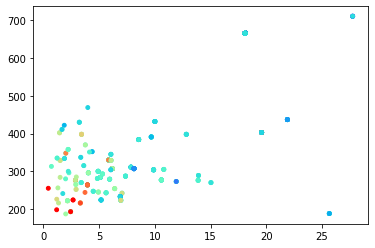

In [10]:
#scatterplot
plt.scatter(X[:, 2], X[:, 9], c=y, s=15, cmap='rainbow');

In [ ]:
#first dataset split to test and train 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xb,yb, test_size=0.3, random_state=42)

In [ ]:
#library
from sklearn.linear_model import LinearRegression

In [ ]:
modelb = LinearRegression(normalize=False)
modelb.fit(X_train,y_train)

print("Score of the train set",modelb.score(X_train,y_train))
print("Score of the test set",modelb.score(X_test,y_test))

Score of the train set 0.7434997532004697
Score of the test set 0.7112260057484974


74 percent of the training data is presented in regression model 

In [ ]:
#Adjusted R2 value
def adj_r2 (X,y,model):
    r_squared = model.score(X,y)
    return(1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1))

print("Adj. R2 of the train set",adj_r2(X_train,y_train,modelb))
print("Adj. R2 of the test set",adj_r2(X_test,y_test,modelb))

Adj. R2 of the train set 0.7336923908228405
Adj. R2 of the test set 0.6840226584639355


In [ ]:
#coefficients
importance = modelb.coef_
for i in range(len(importance)):
    print("Feature", df_boston.columns[i], "Score:", importance[i])

Feature CRIM Score: -0.13347010285294458
Feature ZN Score: 0.03580891359323345
Feature INDUS Score: 0.04952264522005847
Feature CHAS Score: 3.119835116285383
Feature NOX Score: -15.417060895306879
Feature RM Score: 4.057199231645367
Feature AGE Score: -0.010820835184929722
Feature DIS Score: -1.3859982431608764
Feature RAD Score: 0.24272733982224778
Feature TAX Score: -0.008702234365662913
Feature PTRATIO Score: -0.9106852081102895
Feature B Score: 0.011794115892569896
Feature LSTAT Score: -0.5471133128239618


In [ ]:
# Dropping colerated features
new_df = df_boston.drop(["AGE","INDUS"],axis=1)

In [ ]:
#split test and train dataset
#after normalization, results are getting better 
X_train, X_test, y_train, y_test = train_test_split(new_df,yb, test_size=0.3, random_state=42)
modelb = LinearRegression(normalize=True)
modelb.fit(X_train,y_train)
print("Score of the train set",modelb.score(X_train,y_train))
print("Score of the test set",modelb.score(X_test,y_test))

Score of the train set 0.7428288884259309
Score of the test set 0.7149039348907361


In [ ]:
#adj r2 of test set increased after normalization 
print("Score of the train set",adj_r2(X_train,y_train,modelb))
print("Score of the test set",adj_r2(X_test,y_test,modelb))

Score of the train set 0.7345573029659462
Score of the test set 0.6925035297750082


In [ ]:
X_new = new_df.drop('index', axis = 1)

from sklearn.preprocessing import StandardScaler, MinMaxScaler
X_scaled = StandardScaler().fit_transform(X_new)
X_scaled

array([[-0.50009668,  0.42727822, -1.25466328, ..., -1.48379449,
         0.43991388, -1.1282211 ],
       [-0.49580542, -0.48858069, -0.55367539, ..., -0.312853  ,
         0.43991388, -0.48493501],
       [-0.49580951, -0.48858069, -0.55367539, ..., -0.312853  ,
         0.36091635, -1.27512537],
       ...,
       [-0.4889668 , -0.48858069,  0.16203913, ...,  1.18595212,
         0.43991388, -1.02616129],
       [-0.47898384, -0.48858069,  0.16203913, ...,  1.18595212,
         0.37295037, -0.89626698],
       [-0.49169611, -0.48858069,  0.16203913, ...,  1.18595212,
         0.43991388, -0.67977647]])

In [ ]:
# Outliers removed & scaling
#best results for train set but model cannot present test dataset properly. 
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y_new, test_size=0.3, random_state=42)
modelb = LinearRegression(normalize=False)
modelb.fit(X_train,y_train)
print("Score of the train set",modelb.score(X_train,y_train))
print("Score of the test set",modelb.score(X_test,y_test))

Score of the train set 0.7598701100873174
Score of the test set 0.6739782514175502


In [ ]:
# With outliers & not scaled
#model present test set more accurately
X_train, X_test, y_train, y_test = train_test_split(Xb,yb, test_size=0.3, random_state=42)
modelb = LinearRegression(normalize=False)
modelb.fit(X_train,y_train)
print("Score of the train set",modelb.score(X_train,y_train))
print("Score of the test set",modelb.score(X_test,y_test))

Score of the train set 0.7434997532004697
Score of the test set 0.7112260057484974


In [ ]:
# With outlier but scaling
#scaling does not affect regression model 
X_alls = StandardScaler().fit_transform(Xb)
X_train, X_test, y_train, y_test = train_test_split(X_alls,yb, test_size=0.3, random_state=42)

modelb = LinearRegression(normalize=False)
modelb.fit(X_train,y_train)
print("Score of the train set",modelb.score(X_train,y_train))
print("Score of the test set",modelb.score(X_test,y_test))

Score of the train set 0.7434997532004697
Score of the test set 0.7112260057484923


In [ ]:
y_pred = modelb.predict(X_test)
#no overfiting problem aroused. On the other hand try regulizers to check if model performance increases

# Ridge and Lasso regression 

In [ ]:
#Import numerical libraries
import pandas as pd
import numpy as np

#Import graphical plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Import Linear Regression Machine Learning Libraries
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score

In [ ]:
#regression coefficients
print("Intercept: ",modelb.intercept_)
print("Coef: ",modelb.coef_)

Intercept:  31.631084035694734
Coef:  [-1.33470103e-01  3.58089136e-02  4.95226452e-02  3.11983512e+00
 -1.54170609e+01  4.05719923e+00 -1.08208352e-02 -1.38599824e+00
  2.42727340e-01 -8.70223437e-03 -9.10685208e-01  1.17941159e-02
 -5.47113313e-01]


In [ ]:
alphas=[0.25,0.3,0.35,0.4,0.45,0.8]
alphas

[0.25, 0.3, 0.35, 0.4, 0.45, 0.8]

In [ ]:
ridge = Ridge(normalize = True)
coefs = []

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)
    print(f'Ridge model coef: {ridge.coef_}')
    print("Ridge Train: ", ridge.score(X_train, y_train))
    print("Ridge Test: ", ridge.score(X_test, y_test))
np.shape(coefs)
#when weigth penalty incresed, penalty point alpha increases. 

Ridge model coef: [-7.32659767e-02  2.32642757e-02 -6.22963863e-02  2.89193655e+00
 -7.11048694e+00  3.89124758e+00 -6.64427881e-03 -7.17144356e-01
  6.47955778e-02 -3.31014639e-03 -7.41616945e-01  8.31053123e-03
 -3.96828423e-01]
Ridge Train:  0.3815849626113118
Ridge Test:  0.36350415835023464
Ridge model coef: [-7.13446994e-02  2.21710621e-02 -6.46998598e-02  2.86167900e+00
 -6.48320105e+00  3.81967219e+00 -7.01558476e-03 -6.50302305e-01
  5.33605121e-02 -3.12997224e-03 -7.19386675e-01  8.10406215e-03
 -3.81442301e-01]
Ridge Train:  0.41931767660523583
Ridge Test:  0.4132642127762904
Ridge model coef: [-6.97901154e-02  2.13448353e-02 -6.64791693e-02  2.82694432e+00
 -5.99851317e+00  3.74427914e+00 -7.32134688e-03 -5.94080121e-01
  4.42090127e-02 -3.01175893e-03 -6.99446212e-01  7.90877151e-03
 -3.67668299e-01]
Ridge Train:  0.4392943708480701
Ridge Test:  0.4397873206633726
Ridge model coef: [-6.84900363e-02  2.07023147e-02 -6.78377233e-02  2.78929537e+00
 -5.61576004e+00  3.6675284

(6, 13)

In [ ]:
alpha=[0.01,0.001,0.0015,0.00046,0.0005]

In [ ]:
lasso = Lasso (normalize = True)
coeflas = []

for a in alpha:
    lasso.set_params(alpha = a)
    lasso.fit(X, y)
    coefs.append(lasso.coef_)
    print(f'Lasso model coef: {lasso.coef_}')
    print("lasso Train: ", lasso.score(X_train, y_train))
    print("lasso Test: ", lasso.score(X_test, y_test))
np.shape(coefslas)
#lasso regression does not affect regression process 


Lasso model coef: [-0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  3.75573037e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -5.86548910e-01  9.26861990e-04
 -4.94720176e-01]
lasso Train:  -0.07250342039375846
lasso Test:  -0.07062277885382695
Lasso model coef: [-1.05090777e-01  4.46491114e-02  8.21949305e-03  2.69551725e+00
 -1.71694248e+01  3.82707958e+00  0.00000000e+00 -1.45631576e+00
  2.87370412e-01 -1.13864289e-02 -9.43558127e-01  9.21840777e-03
 -5.23058248e-01]
lasso Train:  -3.3689859536220474
lasso Test:  -4.421577979057314
Lasso model coef: [-1.04946799e-01  4.45651315e-02  7.60583050e-03  2.69582915e+00
 -1.71423886e+01  3.82770544e+00  0.00000000e+00 -1.45520226e+00
  2.86459231e-01 -1.13397166e-02 -9.43130114e-01  9.21332054e-03
 -5.23018305e-01]
lasso Train:  -3.3517467648156263
lasso Test:  -4.3998726101342545
Lasso model coef: [-1.04653297e-01  4.43962372e-02  6.37279489e-03  2.69648275e+00
 -1.70877699e+01  3.82

(0,)

In [ ]:
### Score Comparison according to R2 
#Simple Linear Model
print("Simple Train: ", modelb.score(X_train, y_train))
print("Simple Test: ", modelb.score(X_test, y_test))
print('*************************')
#Lasso
print("Lasso Train: ", lasso.score(X_train, y_train))
print("Lasso Test: ", lasso.score(X_test, y_test))
print('*************************')
#Ridge
print("Ridge Train: ", ridge.score(X_train, y_train))
print("Ridge Test: ", ridge.score(X_test, y_test))


Simple Train:  0.7434997532004697
Simple Test:  0.7112260057484923
*************************
Lasso Train:  -3.282405379841154
Lasso Test:  -4.3125529787763695
*************************
Ridge Train:  0.48286079140118543
Ridge Test:  0.4912119640513835
